In [150]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from wordcloud import WordCloud

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

### Women's Clothing E-Commerce Reviews

In [115]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv.zip', index_col=0)

In [116]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [117]:
df.rename(columns={'Clothing ID':'clothing_id' ,'Review Text':'review_text' ,'Recommended IND':'Recommended', 'Positive Feedback Count':'positive_feedback_count','Division Name':'division', 'Department Name':'department','Class Name':'class'} , inplace=True)

In [184]:
analyzer = SentimentIntensityAnalyzer()  # vaderSentiment

In [119]:
df['review_text'] = df['review_text'].astype(str)

In [120]:
#Add VADER metrics to dataframe

df['compound'] = [analyzer.polarity_scores(v)['compound'] for v in df['review_text']]
df['neg'] = [analyzer.polarity_scores(v)['neg'] for v in df['review_text']]
df['neu'] = [analyzer.polarity_scores(v)['neu'] for v in df['review_text']]
df['pos'] = [analyzer.polarity_scores(v)['pos'] for v in df['review_text']]

In [121]:
df.head()

,clothing_id,Age,Title,review_text,Rating,Recommended,positive_feedback_count,division,department,class,compound,neg,neu,pos
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.8932,0.000,0.319,0.681
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.9729,0.000,0.702,0.298
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.9208,0.025,0.831,0.144
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.5727,0.207,0.396,0.397
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.9291,0.000,0.700,0.300


In [122]:
df['Rating'].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

In [123]:
# let´see vader sentiment, length of the reviews, review texts, rating and is it recommended or not
# focus on these columns

In [124]:
df['review_length']= df['review_text'].apply(len)
df[['review_text', 'Rating', 'Recommended','compound', 'neg', 'neu','pos', 'review_length']]

,review_text,Rating,Recommended,compound,neg,neu,pos,review_length
0,Absolutely wonderful - silky and sexy and comf...,4,1,0.8932,0.000,0.319,0.681,53
1,Love this dress! it's sooo pretty. i happene...,5,1,0.9729,0.000,0.702,0.298,303
2,I had such high hopes for this dress and reall...,3,0,0.9208,0.025,0.831,0.144,500
3,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0.5727,0.207,0.396,0.397,124
4,This shirt is very flattering to all due to th...,5,1,0.9291,0.000,0.700,0.300,192
...,...,...,...,...,...,...,...,...
23481,I was very happy to snag this dress at such a ...,5,1,0.9152,0.060,0.582,0.358,131
23482,"It reminds me of maternity clothes. soft, stre...",3,1,0.3919,0.069,0.798,0.133,223
23483,"This fit well, but the top was very see throug...",3,0,0.9343,0.000,0.709,0.291,208
23484,I bought this dress for a wedding i have this ...,3,1,0.6692,0.061,0.830,0.109,427


In [196]:
pd.DataFrame(df.groupby(['review_length'])['Rating'].value_counts()).head(5)

Rating
review_length Rating        
3             5          591
              4          169
              3           48
              1           21
              2           16

<AxesSubplot:xlabel='review_length'>

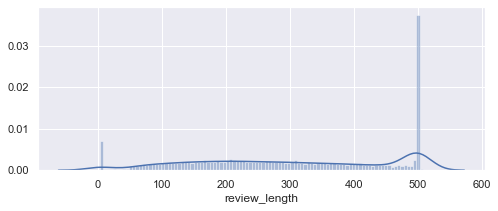

In [149]:
sns.set(rc={'figure.figsize':(8,3)})
sns.distplot(df['review_length'],hist=True, bins=100 )

In [126]:
df['review_length_bins']=pd.cut(df['review_length'], bins=[100,200,300,400,500,600], labels=['between 0 and 100' , 'between 100 and 200','between 200 and 300','between 300 and 400','between 400 and 500'])

<AxesSubplot:xlabel='review_length_bins,Rating'>

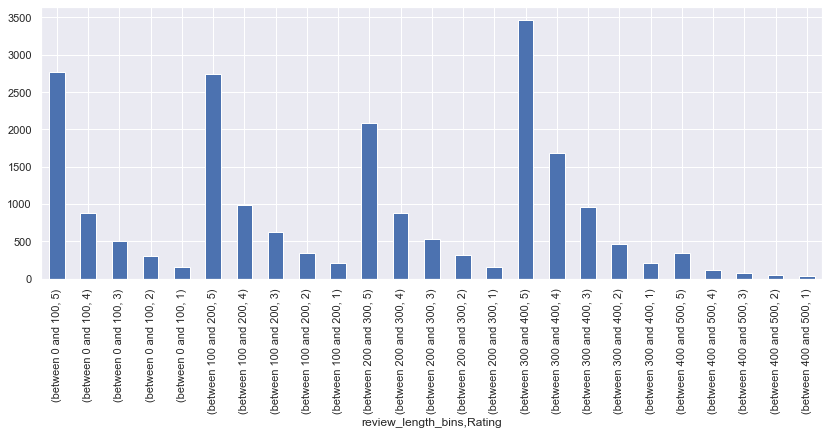

In [127]:
plt.figure(figsize=(14,5))

df.groupby(['review_length_bins'])['Rating'].value_counts().plot.bar()

In [197]:
df[df['Rating']== 5][['review_text', 'Rating', 'compound', 'neg', 'neu','pos']] #vader sentiment at highest reviews

,review_text,Rating,compound,neg,neu,pos
1,Love this dress! it's sooo pretty. i happene...,5,0.9729,0.000,0.702,0.298
3,"I love, love, love this jumpsuit. it's fun, fl...",5,0.5727,0.207,0.396,0.397
4,This shirt is very flattering to all due to th...,5,0.9291,0.000,0.700,0.300
6,I aded this in my basket at hte last mintue to...,5,0.6779,0.044,0.871,0.085
8,I love this dress. i usually get an xs but it ...,5,0.7175,0.000,0.842,0.158
...,...,...,...,...,...,...
23474,"Yes, this is a great dress! i wasn't sure abou...",5,0.9922,0.030,0.659,0.311
23479,So i wasn't sure about ordering this skirt bec...,5,0.9820,0.014,0.743,0.243
23480,nan,5,0.0000,0.000,1.000,0.000
23481,I was very happy to snag this dress at such a ...,5,0.9152,0.060,0.582,0.358


In [129]:
df[df['Rating']== 1][['review_text', 'Rating', 'compound', 'neg', 'neu','pos']] #vader sentiment at worst reviews

,review_text,Rating,compound,neg,neu,pos
61,"3 tags sewn in, 2 small (about 1'' long) and 1...",1,-0.6499,0.128,0.797,0.075
85,"I was really hoping to like this, but it did n...",1,0.8287,0.022,0.868,0.110
96,I usually wear a medium and bought a small. it...,1,-0.5566,0.163,0.733,0.103
97,I was very excited to order this top in red xs...,1,0.8903,0.000,0.682,0.318
110,This is so thin and poor quality. especially f...,1,-0.4877,0.167,0.722,0.111
...,...,...,...,...,...,...
23255,Pants are overpriced and very uncomfortable. t...,1,-0.9164,0.184,0.816,0.000
23274,"I'm 5'7"" 155lbs and ordered a large. it fit, b...",1,0.3612,0.056,0.863,0.081
23352,I loved the print and fabric of this dress whe...,1,0.2685,0.108,0.755,0.137
23406,I was very excited to find a fun and lightweig...,1,0.9658,0.040,0.716,0.244


Text(0, 0.5, 'vader sentiment compound')

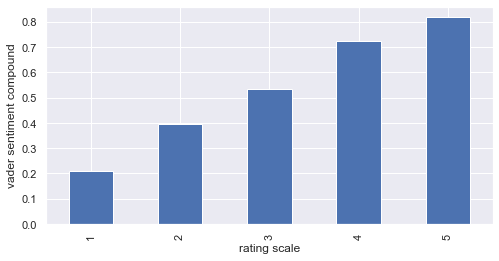

In [130]:
plt.figure(figsize=(8,4))
df.groupby(['Rating'])['compound'].mean().plot.bar()
plt.xlabel('rating scale')
plt.ylabel('vader sentiment compound')

<AxesSubplot:xlabel='compound'>

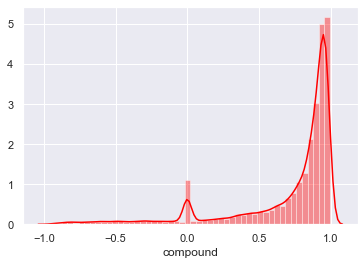

In [131]:
sns.distplot(df['compound'], color = 'red')  #  Distribution plot for compound

<AxesSubplot:xlabel='pos'>

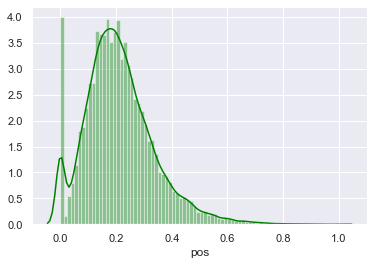

In [132]:
sns.distplot(df['pos'], color = 'green', bins= 80)

Text(0, 0.5, 'vader sentiment negative')

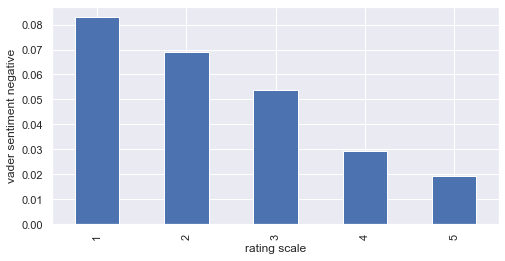

In [133]:
plt.figure(figsize=(8,4))
df.groupby(['Rating'])['neg'].mean().plot.bar()
plt.xlabel('rating scale')
plt.ylabel('vader sentiment negative')

<AxesSubplot:xlabel='neg'>

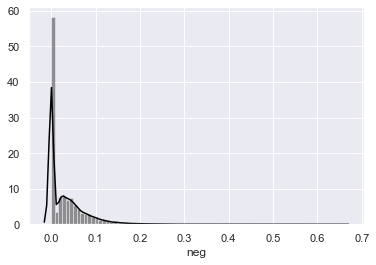

In [134]:
sns.distplot(df['neg'], color = 'black', bins= 80)

In [135]:
# not recommended 0, recommended 1

In [136]:
df_not_recommended=pd.DataFrame(Counter(" ".join(df[df['Recommended']== 0]['review_text']).split()).most_common(30))
df_not_recommended.head(10)  # 10 most common words from reviews which are in the group of not recommend

,0,1
0,the,15744
1,i,8841
2,and,8116
3,it,7514
4,a,6804
5,is,4799
6,to,4547
7,was,4137
8,this,4050
9,in,3705


In [198]:
df_recommended=pd.DataFrame(Counter(" ".join(df[df['Recommended']== 1]['review_text']).split()).most_common(30))
df_recommended.head(10) # 10 most common words from reviews which are in the group of recommend

,0,1
0,the,58954
1,i,40789
2,and,40389
3,a,35828
4,it,29788
5,is,25523
6,to,19767
7,this,16676
8,in,16506
9,but,12601


In [138]:
# the first 6 words are the same. 

In [139]:
df_high_compound=pd.DataFrame(Counter(" ".join(df[df['compound'] > 0.7]['review_text']).split()).most_common(30))
df_high_compound.head(10)

,0,1
0,the,57851
1,i,39531
2,and,39400
3,a,34361
4,it,29367
5,is,24488
6,to,18975
7,this,16509
8,in,15875
9,but,12162


In [140]:
df_low_compound=pd.DataFrame(Counter(" ".join(df[df['compound'] < 0.4]['review_text']).split()).most_common(30))
df_low_compound.head(10)

,0,1
0,the,9172
1,i,5375
2,and,4755
3,it,4207
4,a,4147
5,is,2960
6,to,2804
7,in,2298
8,this,2236
9,but,2233


(-0.5, 1599.5, 799.5, -0.5)

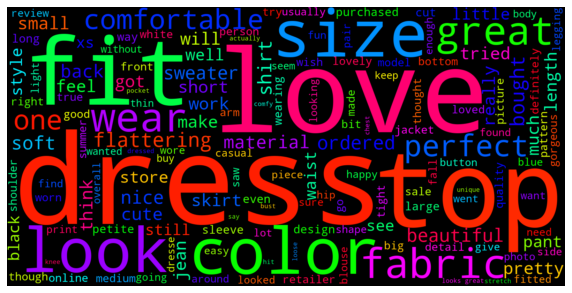

In [141]:
# the 150 most common words in the review text where the compound is over 0.7, so positive feedback
plt.figure(figsize = (10,16))
positive_wc =WordCloud(width = 1600 , height = 800 , max_words = 150, colormap = 'hsv').generate(" ".join(df[df['compound'] > 0.7].review_text))
plt.imshow(positive_wc, interpolation = 'bilinear')
plt.axis("off")

(-0.5, 1599.5, 799.5, -0.5)

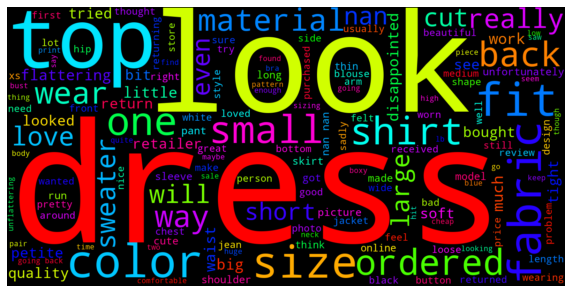

In [142]:
# the 150 most common words in the review text where the compound is lower than 0.4, so negative feedback
plt.figure(figsize = (10,16))
negative_wc =WordCloud(width = 1600 , height = 800 , max_words = 150, colormap = 'hsv').generate(" ".join(df[df['compound'] < 0.4].review_text))
plt.imshow(negative_wc, interpolation = 'bilinear')
plt.axis("off")

In [153]:
df['review_text'].isna().sum()

0

In [157]:
conv_review = CountVectorizer()  # convert the text doc to a matrix of token counts

In [158]:
analyze = conv_review.build_analyzer()

In [161]:
def word_counts(st):
    w = {}
    if analyze(st):
        voc ={}  #find counts of vocabularies, transform to array
        sentence = conv_review.fit_transform([st]).toarray()
        vector_words= conv_review.vocabulary_
        
        for k,v in vector_words.items():
            voc[v]=k
        for index, i in enumerate(sentence[0]):
            w[voc[index]]=i
    return w

In [168]:
df['word_counts'] =df['review_text'].apply(word_counts)

In [183]:
df[['review_text','Rating','Recommended','compound', 'neg', 'neu','pos', 'review_length','word_counts']]

,review_text,Rating,Recommended,compound,neg,neu,pos,review_length,word_counts
0,Absolutely wonderful - silky and sexy and comf...,4,1,0.8932,0.000,0.319,0.681,53,"{'absolutely': 1, 'and': 2, 'comfortable': 1, ..."
1,Love this dress! it's sooo pretty. i happene...,5,1,0.9729,0.000,0.702,0.298,303,"{'am': 1, 'and': 2, 'bc': 2, 'be': 1, 'below':..."
2,I had such high hopes for this dress and reall...,3,0,0.9208,0.025,0.831,0.144,500,"{'and': 3, 'be': 1, 'bottom': 1, 'but': 2, 'ch..."
3,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0.5727,0.207,0.396,0.397,124,"{'and': 1, 'but': 1, 'compliments': 1, 'every'..."
4,This shirt is very flattering to all due to th...,5,1,0.9291,0.000,0.700,0.300,192,"{'adjustable': 1, 'all': 1, 'and': 1, 'any': 1..."
...,...,...,...,...,...,...,...,...,...
23481,I was very happy to snag this dress at such a ...,5,1,0.9152,0.060,0.582,0.358,131,"{'and': 2, 'at': 1, 'color': 1, 'combo': 1, 'c..."
23482,"It reminds me of maternity clothes. soft, stre...",3,1,0.3919,0.069,0.798,0.133,223,"{'and': 1, 'awkward': 1, 'but': 1, 'button': 1..."
23483,"This fit well, but the top was very see throug...",3,0,0.9343,0.000,0.709,0.291,208,"{'able': 1, 'and': 1, 'been': 1, 'but': 1, 'di..."
23484,I bought this dress for a wedding i have this ...,3,1,0.6692,0.061,0.830,0.109,427,"{'after': 1, 'and': 4, 'be': 1, 'big': 1, 'bou..."
